In [3]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [4]:
def RK_2(r, h, alpha=0.5):
    # input : r = x_т, y_т - очередное решение за шаге n
    #         h - шаг по времени
    k1 = r + h * f(r[0], r[1]) / (2 * alpha) # первое приближение
    return r + h * ((1 - alpha) * f(r[0], r[1]) + alpha * f(k1[0], k1[1])) # возвращает пару чисел - x_n+1, y_n+1

In [5]:
a, b, c, d = 10, 2, 2, 10

In [6]:
dx_dt = lambda x, y: x * (a - b * y)
dy_dt = lambda x, y: y * (c * x - d)
f = lambda x, y: np.array([dx_dt(x, y), dy_dt(x, y)]) # двумерная функция двух переменных

In [7]:
def solution(r0, N, h, r_min, r_max):
    # input : r0 - начальные x_0, y_0 для данной фазовой траектории
    #         N - кол-во отсчетов по времени
    #         h - шаг по времени
    #         r_min, r_max - границы отображения траекторий на картинке 
    #                        (т.к. скорости движения разные, например, прямолинейные траектории
    #                         слишком быстро уходят на большие значения 
    #                         и мешают отображению менее масштабных траекторий)
    r = np.array([np.zeros(2) for i in range(N)]) # массив из N пар координат точек (x, y) - пока заполнен нулями
    r[0] = r0
    for i in range(1, N):
        r[i] = RK_2(r[i - 1], h)
        # проверка на каждом шаге на выход за пределы рассматриваемой зоны фазового пространства
        if (r[i,0] > r_max[0]) or (r[i,1] > r_max[1]) or (r[i,0] < r_min[0]) or (r[i,1] < r_min[1]):
            r = r[:i]
            break
    return r.transpose() # возвращает массивы x и y, каждый из не более N точек

In [30]:
R = []
for i in np.arange(-30, 30 + 1, 5):
    for j in np.arange(-30, 30 + 1, 5):
        R += [[i, j]]

In [11]:
R = [[5, 15]]

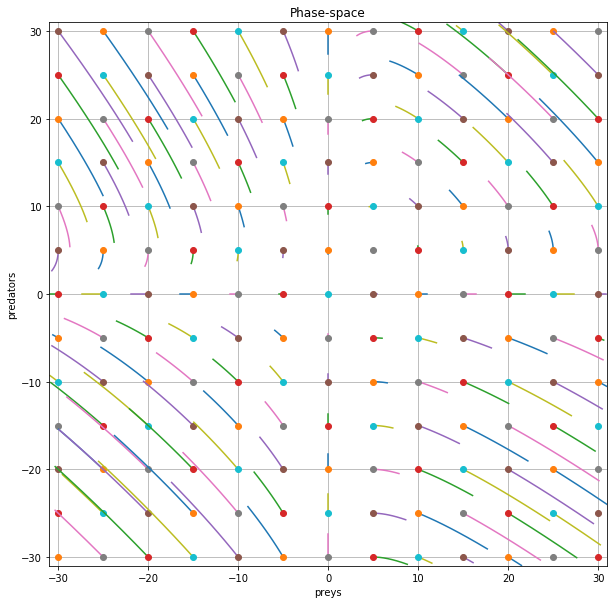

In [35]:
M = 15    # кол-во отображаемых фазовых траекторий (возможное)
h = 1.e-3 # шаг по времени

#g = [[2.5 + i * 0.5, -6 + 2 * i] for i in range(M)]
g = R

plt.figure(figsize=(10, 10))
plt.subplot()

for r0 in g:
    x, y = solution(r0, 10, h, [-31, -31], [31, 31])
    plt.plot(x, y, '-')
    plt.plot(r0[0], r0[1], 'o')
    
plt.grid()
plt.xlim([-31, 31])
plt.ylim([-31, 31])
plt.xlabel('preys')
plt.ylabel('predators')
plt.title('Phase-space')
plt.show()

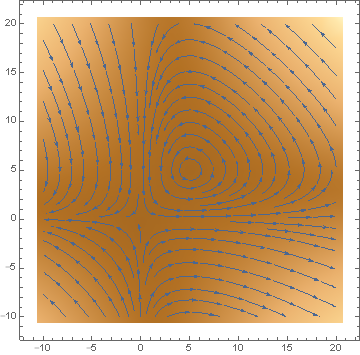

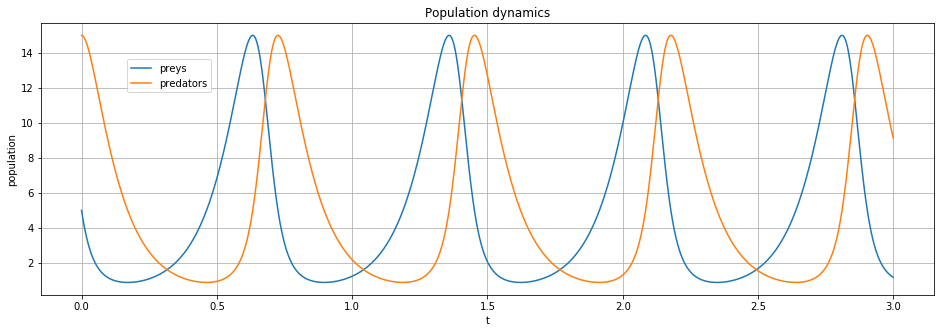

In [11]:
N = 3000
h = 1.e-3
R0 = [5, 15]
t = [h * n for n in range(N)]
x, y = solution(R0, N, h, [0, 0], [30, 30])

plt.figure(figsize=(16, 5))
plt.subplot()

plt.plot(t, x, label='preys')
plt.plot(t, y, label='predators')

plt.legend(loc=[0.096, 0.745])
plt.grid()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Population dynamics')
plt.show()